ARBOL DE DECISIONES

Ejemplo: Iris

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer,load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [56]:
iris=load_iris()

In [57]:
#dividiendo datos para el entrenamiento
X_train,X_test,Y_train,Y_test=train_test_split(iris.data,iris.target)

In [58]:
arbol=DecisionTreeClassifier()

In [59]:
arbol.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
arbol.score(X_test,Y_test)

0.9736842105263158

In [61]:
arbol.score(X_train,Y_train)

1.0

In [68]:
arbol.score(X_test,Y_test)

0.9736842105263158

In [62]:
export_graphviz(arbol,out_file='arbol.dot',class_names=iris.target_names,
                feature_names=iris.feature_names,impurity=False,filled=True)

In [63]:
#with open(r'C:\Users\Michael\Desktop\arch\SCIKIT LEARN\ARBOL DE DECISIONES\arbol.dot') as f:
#    dot_graph=f.read()
#graphviz.Source(dot_graph)

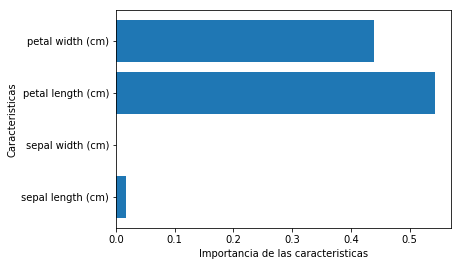

In [64]:
caract=iris.data.shape[1]
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristicas')
plt.show()

In [69]:
arbol=DecisionTreeClassifier(max_depth=5)

In [70]:
arbol.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
arbol.score(X_test,Y_test)

0.9736842105263158

In [72]:
arbol.score(X_train,Y_train)

1.0

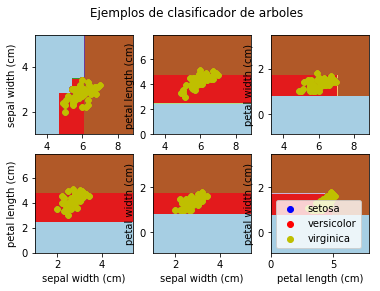

In [96]:
n_clases=3
plot_colors='bry'
plot_step=0.02
for pairidx,pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
    X=iris.data[:,pair]
    Y=iris.target
    #entrenar algoritmo
    clf=DecisionTreeClassifier(max_depth=3).fit(X,Y)
    
    plt.subplot(2,3,pairidx+1)
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,plot_step),
                     np.arange(y_min,y_max,plot_step))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=Z.reshape(xx.shape)
    cs=plt.contourf(xx,yy,z,cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    
    for i,color in zip(range(n_clases),plot_colors):
        idx=np.where(Y==1)
        plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],
                   cmap=plt.cm.Paired)
    plt.axis("tight")
plt.suptitle('Ejemplos de clasificador de arboles')
plt.legend()
plt.show()